####    
**ONE:**
1) Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

**TWO:**
1) Extract reviews of any product from ecommerce website like amazon


2) Perform emotion mining

### Import Libraries

In [813]:
import nltk
nltk.download('stopwords')  #The stopwords in nltk are the most common words in data. They are words that you do not want to use to describe the topic of your content. They are pre-defined and cannot be removed

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [814]:
nltk.download('wordnet') #The WordNet is a part of Python's Natural Language Toolkit. It is a large word database of English Nouns, Adjectives, Adverbs and Verbs. These are grouped into some set of cognitive synonyms, which are called synsets.

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\manas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [815]:
pip install -U textblob 

Note: you may need to restart the kernel to use updated packages.


In [816]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from textblob import TextBlob
import string
import spacy


import warnings
warnings.filterwarnings('ignore')

## 1. Read Data

In [817]:
data = pd.read_csv('Elon_musk.csv',encoding="latin-1")
data

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


## 2. Number of Words

In [818]:
#Number of Words in single tweet


In [819]:
data['word_count'] = data['Text'].apply(lambda x: len(str(x).split("  ")))
data[['Text','word_count']]

,Text,word_count
0,@kunalb11 Im an alien,1
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,1
2,@joerogan @Spotify Great interview!,1
3,@gtera27 Doge is underestimated,1
4,@teslacn Congratulations Tesla China for amazi...,1
...,...,...
1994,"@flcnhvy True, it sounds so surreal, but the n...",1
1995,@PPathole Make sure to read ur terms &amp; con...,1
1996,@TeslaGong @PPathole Samwise Gamgee,1
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,1


## 3. Number of Characters

In [820]:
#Number of characters in single tweet
data['char_count'] = data['Text'].str.len() ## this also includes spaces
data[['Text','char_count']].head()

,Text,char_count
0,@kunalb11 Im an alien,22
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,82
2,@joerogan @Spotify Great interview!,35
3,@gtera27 Doge is underestimated,31
4,@teslacn Congratulations Tesla China for amazi...,104


## 4. Average Word Length

In [821]:
def avg_word(sentence):
    words = sentence.split()
    return(sum(len(word) for word in words)/len(words))

In [822]:
data['avg_word'] = data['Text'].apply(lambda x: avg_word(x))
data[['Text','avg_word']].head()

,Text,avg_word
0,@kunalb11 Im an alien,4.750000
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,5.384615
2,@joerogan @Spotify Great interview!,8.000000
3,@gtera27 Doge is underestimated,7.000000
4,@teslacn Congratulations Tesla China for amazi...,5.176471


## 5. Number of stopwords

In [823]:
stop = stopwords.words('english')

data['stopwords'] = data['Text'].apply(lambda x: len([x for x in x.split() if x in stop]))
data[['Text','stopwords']].head()

,Text,stopwords
0,@kunalb11 Im an alien,1
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,4
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,1
4,@teslacn Congratulations Tesla China for amazi...,5


## 6. Number of Special Characters

In [824]:
data['hastags'] = data['Text'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
data[['Text','hastags']].head()

,Text,hastags
0,@kunalb11 Im an alien,1
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,1
2,@joerogan @Spotify Great interview!,2
3,@gtera27 Doge is underestimated,1
4,@teslacn Congratulations Tesla China for amazi...,1


## 7. Number of Numerics

In [825]:
data['numerics'] = data['Text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
data[['Text','numerics']].head()

,Text,numerics
0,@kunalb11 Im an alien,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,0
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,0
4,@teslacn Congratulations Tesla China for amazi...,0


## 8. Number of Upper Case Words

In [826]:
data['upper'] = data['Text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
data[['Text','upper']].head()

,Text,upper
0,@kunalb11 Im an alien,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,1
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,0
4,@teslacn Congratulations Tesla China for amazi...,0


# 2.Pre - Processing

### 2.1 Lower Case

In [827]:
data['Text'] = data['Text'].apply(lambda x: "  ".join(x.lower()for x in x.split()))
data['Text']

0                               @kunalb11  im  an  alien
1       @id_aa_carmack  ray  tracing  on  cyberpunk  w...
2                  @joerogan  @spotify  great  interview!
3                      @gtera27  doge  is  underestimated
4       @teslacn  congratulations  tesla  china  for  ...
                              ...                        
1994    @flcnhvy  true,  it  sounds  so  surreal,  but...
1995    @ppathole  make  sure  to  read  ur  terms  &a...
1996               @teslagong  @ppathole  samwise  gamgee
1997    @ppathole  altho  dumb  and  dumber  is  <u+00...
1998                         progress  update  august  28
Name: Text, Length: 1999, dtype: object

### 2.2 Removing Punctuation

In [828]:
data['Text'] = data['Text'].str.replace('[^\w\s]','    ')
data['Text']

0                             kunalb11  i    m  an  alien
1           id_aa_carmack  ray  tracing  on  cyberpunk...
2             joerogan      spotify  great  interview    
3                       gtera27  doge  is  underestimated
4           teslacn  congratulations  tesla  china  fo...
                              ...                        
1994        flcnhvy  true      it  sounds  so  surreal...
1995        ppathole  make  sure  to  read  ur  terms ...
1996             teslagong      ppathole  samwise  gamgee
1997        ppathole  altho  dumb  and  dumber  is    ...
1998                         progress  update  august  28
Name: Text, Length: 1999, dtype: object

### 2.3 Removal of Stop Words

In [829]:
stop = stopwords.words('english')
data['Text'] = data['Text'].apply(lambda x:"  ".join(x for x in x.split() if x not in stop))
data['Text'].head()

0                                      kunalb11  alien
1    id_aa_carmack  ray  tracing  cyberpunk  hdr  n...
2                  joerogan  spotify  great  interview
3                        gtera27  doge  underestimated
4    teslacn  congratulations  tesla  china  amazin...
Name: Text, dtype: object

### 2.4 Common word removal

In [830]:
freq = pd.Series(' '.join(data['Text']).split()).value_counts()[:10]
freq

co                657
https             655
u                 319
spacex            250
amp               219
tesla             169
erdayastronaut    142
rt                127
ppathole          123
flcnhvy           114
dtype: int64

In [831]:
freq = list(freq.index)
data['Text'] = data['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data['Text'].head()

0                                       kunalb11 alien
1    id_aa_carmack ray tracing cyberpunk hdr next l...
2                     joerogan spotify great interview
3                          gtera27 doge underestimated
4    teslacn congratulations china amazing executio...
Name: Text, dtype: object

### 2.5 Rare Words Removal

In [832]:
freq2 = pd.Series(' '.join(data['Text']).split()).value_counts()[-10:]
freq2

joeingeneral    1
andrewbogut     1
typical         1
unusual         1
24              1
bogus           1
cam             1
z2v15u7zcf      1
disk            1
altho           1
dtype: int64

In [833]:
freq2 = list(freq2.index)
data['Text'] = data['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq2))
data['Text'].head()

0                                       kunalb11 alien
1    id_aa_carmack ray tracing cyberpunk hdr next l...
2                     joerogan spotify great interview
3                          gtera27 doge underestimated
4    teslacn congratulations china amazing executio...
Name: Text, dtype: object

### 2.6 Spelling correction

In [834]:
data['Text'][:5].apply(lambda x:str(TextBlob(x).correct()))

0                                       kunalb11 alien
1    id_aa_carmack ray tracing cyberpunk her next l...
2                     joerogan specify great interview
3                          gtera27 done underestimated
4    teslacn congratulations china amazing executio...
Name: Text, dtype: object

### 2.7 Tokenization

In [835]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\manas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [836]:
TextBlob(data['Text'][1]).words

WordList(['id_aa_carmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'next', 'level', 'tried'])

### 2.8 Stemming

In [837]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
data['Text'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0                                       kunalb11 alien
1    id_aa_carmack ray trace cyberpunk hdr next lev...
2                     joerogan spotifi great interview
3                              gtera27 doge underestim
4    teslacn congratul china amaz execut last year ...
Name: Text, dtype: object

### 2.9 Lemmatization

In [838]:
from textblob import Word

In [839]:
data['Text'] = data['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data['Text'].head()

0                                       kunalb11 alien
1    id_aa_carmack ray tracing cyberpunk hdr next l...
2                     joerogan spotify great interview
3                          gtera27 doge underestimated
4    teslacn congratulation china amazing execution...
Name: Text, dtype: object

## 3 Advanced Text Processing

### 3.1 N-grams

In [840]:
TextBlob(data['Text'][0]).ngrams(2)

[WordList(['kunalb11', 'alien'])]

### 3.2 Term frequency

Term frequency is simply the ratio of the count of a word present in a sentence, to the length of the sentence.

Therefore, we can generalize term frequency as:

TF = (Number of times term T appears in the particular row) / (number of terms in that row)

In [841]:
tf1 = (data['Text'][1:2].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index())
tf1.columns = ['words','tf']
tf1

,words,tf
0,id_aa_carmack,1
1,ray,1
2,tracing,1
3,cyberpunk,1
4,hdr,1
5,next,1
6,level,1
7,tried,1


### 3.3 Inverse Document Frequency
The intuition behind inverse document frequency (IDF) is that a word is not of much use to us if it’s appearing in all the documents.

Therefore, the IDF of each word is the log of the ratio of the total number of rows to the number of rows in which that word is present.

IDF = log(N/n), where, N is the total number of rows and n is the number of rows in which the word was present.

In [842]:
for i,word in enumerate(tf1['words']):
    tf1.loc[i, 'idf'] = np.log(data.shape[0]/(len(data[data['Text'].str.contains(word)])))

tf1

,words,tf,idf
0,id_aa_carmack,1,4.166415
1,ray,1,5.035453
2,tracing,1,7.600402
3,cyberpunk,1,5.115496
4,hdr,1,6.907255
5,next,1,3.936841
6,level,1,5.297817
7,tried,1,5.808643


### 3.4 Term Frequency – Inverse Document Frequency (TF-IDF)

In [843]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1

,words,tf,idf,tfidf
0,id_aa_carmack,1,4.166415,4.166415
1,ray,1,5.035453,5.035453
2,tracing,1,7.600402,7.600402
3,cyberpunk,1,5.115496,5.115496
4,hdr,1,6.907255,6.907255
5,next,1,3.936841,3.936841
6,level,1,5.297817,5.297817
7,tried,1,5.808643,5.808643


In [844]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [845]:
tfidf = TfidfVectorizer(max_features=1000, lowercase=True,analyzer='word',stop_words='english',ngram_range=(1,1))
vect = tfidf.fit_transform(data['Text'])
vect

<1999x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 7673 stored elements in Compressed Sparse Row format>

### 3.5 Bag of Words

In [846]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
data_bow = bow.fit_transform(data['Text'])
data_bow

<1999x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 8298 stored elements in Compressed Sparse Row format>

### 3.6 Sentiment Analysis

In [847]:
data['Text'][:5].apply(lambda x: TextBlob(x).sentiment)

0                                 (-0.25, 0.75)
1                                    (0.0, 0.0)
2                                   (0.8, 0.75)
3                                    (0.0, 0.0)
4    (0.20000000000000004, 0.32222222222222224)
Name: Text, dtype: object

In [848]:
data['sentiment'] = data['Text'].apply(lambda x: TextBlob(x).sentiment[0] )
data[['Text','sentiment']].head()

,Text,sentiment
0,kunalb11 alien,-0.25
1,id_aa_carmack ray tracing cyberpunk hdr next l...,0.00
2,joerogan spotify great interview,0.80
3,gtera27 doge underestimated,0.00
4,teslacn congratulation china amazing execution...,0.20


In [849]:
# Adding index cloumn
data['index']=data['Text'].str.split().apply(len)
data[['Text','sentiment','index']]

,Text,sentiment,index
0,kunalb11 alien,-0.250000,2
1,id_aa_carmack ray tracing cyberpunk hdr next l...,0.000000,8
2,joerogan spotify great interview,0.800000,4
3,gtera27 doge underestimated,0.000000,3
4,teslacn congratulation china amazing execution...,0.200000,9
...,...,...,...
1994,true sound surreal negative propaganda still e...,0.152381,10
1995,make sure read ur term condition clicking accept,0.500000,8
1996,teslagong samwise gamgee,0.000000,3
1997,dumb dumber 0001f525 0001f525,-0.375000,4


In [850]:
# how many words are there in a sentence?
data['word_count']=data['Text'].str.split().apply(len)
data[['Text','sentiment','index','word_count']]

,Text,sentiment,index,word_count
0,kunalb11 alien,-0.250000,2,2
1,id_aa_carmack ray tracing cyberpunk hdr next l...,0.000000,8,8
2,joerogan spotify great interview,0.800000,4,4
3,gtera27 doge underestimated,0.000000,3,3
4,teslacn congratulation china amazing execution...,0.200000,9,9
...,...,...,...,...
1994,true sound surreal negative propaganda still e...,0.152381,10,10
1995,make sure read ur term condition clicking accept,0.500000,8,8
1996,teslagong samwise gamgee,0.000000,3,3
1997,dumb dumber 0001f525 0001f525,-0.375000,4,4


<AxesSubplot:xlabel='sentiment', ylabel='Density'>

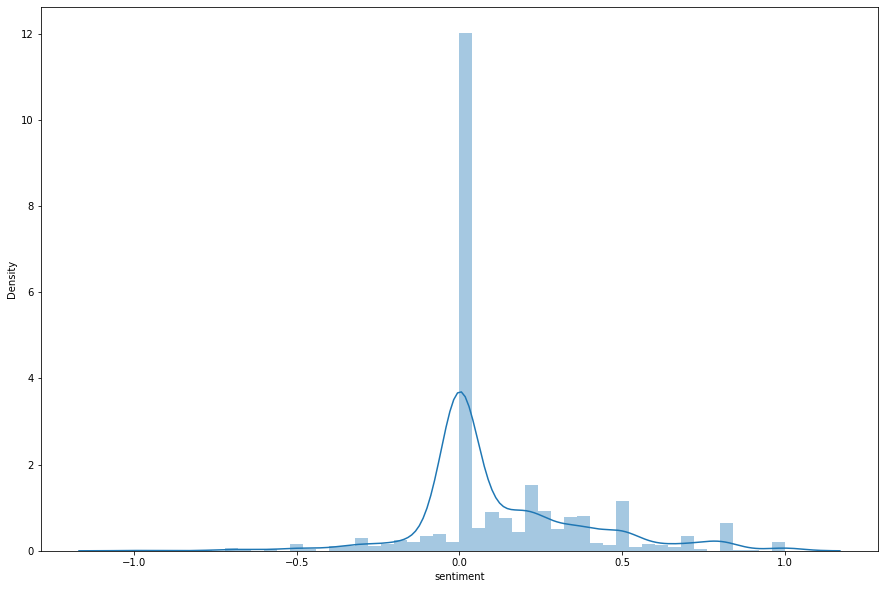

In [851]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(data['sentiment'])

## Perform emotion mining

## Read Data

In [852]:
!pip install future

In [853]:
pip install -U future

Note: you may need to restart the kernel to use updated packages.


In [861]:
import codecs
import re
import copy
import collections
import pandas as pd
import numpy as np
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import WordPunctTokenizer
import matplotlib
    
%matplotlib inline


from __future__ import division
import os
from nltk.corpus import twitter_samples

In [862]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [863]:
from nltk.corpus import stopwords

In [864]:
with codecs.open("positive-words.txt", "r", encoding="utf-8") as p:
    pos = p.read()
    print(pos)

;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
; 
; Opinion Lexicon: Positive
;
; This file contains a list of POSITIVE opinion words (or sentiment words).
;
; This file and the papers can all be downloaded from 
;    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html
;
; If you use this list, please cite one of the following two papers:
;
;   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." 
;       Proceedings of the ACM SIGKDD International Conference on Knowledge 
;       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, 
;       Washington, USA, 
;   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing 
;       and Comparing Opinions on the Web." Proceedings of the 14th 
;       International World Wide Web conference (WWW-2005), May 10-14, 
;       2005, Chiba, Japan.
;
; Notes: 
;    1. The appearance of an opinion word in a sentence does not necessarily  
;       mean that the sentence expresse

In [865]:
with codecs.open("negative-words.txt", "r", encoding="ISO-8859-1") as n:
    neg = n.read()
    print(neg)

;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
; 
; Opinion Lexicon: Negative
;
; This file contains a list of NEGATIVE opinion words (or sentiment words).
;
; This file and the papers can all be downloaded from 
;    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html
;
; If you use this list, please cite one of the following two papers:
;
;   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." 
;       Proceedings of the ACM SIGKDD International Conference on Knowledge 
;       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, 
;       Washington, USA, 
;   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing 
;       and Comparing Opinions on the Web." Proceedings of the 14th 
;       International World Wide Web conference (WWW-2005), May 10-14, 
;       2005, Chiba, Japan.
;
; Notes: 
;    1. The appearance of an opinion word in a sentence does not necessarily  
;       mean that the sentence expres

In [866]:
with codecs.open("stop.txt", "r", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop)

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
against
ain't
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
apart
appear
appreciate
appropriate
are
aren't
around
as
aside
ask
asking
associated
at
available
away
awfully
b
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
believe
below
beside
besides
best
better
between
beyond
both
brief
but
by
c
c'mon
c's
came
can
can't
cannot
cant
cause
causes
certain
certainly
changes
clearly
co
com
come
comes
concerning
consequently
consider
considering
contain
containing
contains
corresponding
could
couldn't
course
currently
d
definitely
described
despite
did
didn't
different
do
does
doesn't
doing
don't
done
down
downwards
during
e
each
edu
eg
eight
either
else
elsewhere
enough
entirely
especially
et
etc
even
ever
every
everybody
everyone
everything
everywhere
ex
exactly
example

In [867]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\manas\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [868]:
from nltk.corpus import twitter_samples

positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')
text = twitter_samples.strings('tweets.20150430-223406.json')

In [869]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\manas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [870]:
from nltk.corpus import twitter_samples

positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')
text = twitter_samples.strings('tweets.20150430-223406.json')
tweet_tokens = twitter_samples.tokenized('positive_tweets.json')

In [871]:
from nltk.corpus import twitter_samples

positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')
text = twitter_samples.strings('tweets.20150430-223406.json')
tweet_tokens = twitter_samples.tokenized('positive_tweets.json')[0]

print(tweet_tokens[0])

#FollowFriday


In [872]:
!pip3 install beautifulsoup4

In [873]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import time
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests

In [874]:
df = pd.read_csv("amazon_products.csv")
df

,Year,Rank,Book_Title,Author,Rating,Num_Customers_Rated,Price
0,2010,1,The Girl Who Kicked the Hornet's Nest (Millenn...,Stieg Larsson,4.7,8475,17.24
1,2010,2,The Girl with the Dragon Tattoo (Millennium Se...,Stieg Larsson,4.4,11516,9.99
2,2010,3,Decision Points,George W. Bush,4.6,2201,17.80
3,2010,4,The Help,Kathryn Stockett,4.8,14772,14.97
4,2010,5,The Girl Who Played with Fire (Millennium Series),Stieg Larsson,4.7,7949,0.02
...,...,...,...,...,...,...,...
1089,2020,96,"Relationship Goals: How to Win at Dating, Marr...",Michael Todd,4.8,13775,10.49
1090,2020,97,The Happy in a Hurry Cookbook: 100-Plus Fast a...,Steve Doocy,4.7,7923,20.98
1091,2020,98,Learn to Read: A Magical Sight Words and Phoni...,Modern Kid Press,4.7,9455,6.99
1092,2020,99,P is for Potty! (Sesame Street) (Lift-the-Flap),Naomi Kleinberg,4.7,16340,5.68


In [875]:
df.shape

(1094, 7)

In [876]:
df.head(61)

,Year,Rank,Book_Title,Author,Rating,Num_Customers_Rated,Price
0,2010,1,The Girl Who Kicked the Hornet's Nest (Millenn...,Stieg Larsson,4.7,8475,17.24
1,2010,2,The Girl with the Dragon Tattoo (Millennium Se...,Stieg Larsson,4.4,11516,9.99
2,2010,3,Decision Points,George W. Bush,4.6,2201,17.80
3,2010,4,The Help,Kathryn Stockett,4.8,14772,14.97
4,2010,5,The Girl Who Played with Fire (Millennium Series),Stieg Larsson,4.7,7949,0.02
...,...,...,...,...,...,...,...
56,2010,57,"Eat, Pray, Love: One Woman's Search for Everyt...",Elizabeth Gilbert,4.3,6353,12.69
57,2010,58,Eat Pray Love: One Woman's Search for Everythi...,Elizabeth Gilbert,4.3,6353,8.99
58,2010,59,Tao I: The Way of All Life,Zhi Gang Sha Dr.,4.3,75,23.69
59,2010,60,The Checklist Manifesto: How to Get Things Right,Atul Gawande,4.6,3812,23.80


In [877]:
df['Rating'] = df['Rating'].apply(lambda x:x)
df['Rating'] = pd.to_numeric(df['Rating'])

In [878]:
df["Price"] = df["Price"].replace('₹', '')
df["Price"] = df["Price"].replace(',', '')

In [879]:
df['Price'] = df['Price'].apply(lambda x: x)

In [880]:
df['Price'] = df['Price'].astype(int)

In [881]:
df["Num_Customers_Rated"] = df["Num_Customers_Rated"].replace(',', '')

In [882]:
df['Num_Customers_Rated'] = pd.to_numeric(df['Num_Customers_Rated'], errors='ignore')

In [883]:
df.head()

,Year,Rank,Book_Title,Author,Rating,Num_Customers_Rated,Price
0,2010,1,The Girl Who Kicked the Hornet's Nest (Millenn...,Stieg Larsson,4.7,8475,17
1,2010,2,The Girl with the Dragon Tattoo (Millennium Se...,Stieg Larsson,4.4,11516,9
2,2010,3,Decision Points,George W. Bush,4.6,2201,17
3,2010,4,The Help,Kathryn Stockett,4.8,14772,14
4,2010,5,The Girl Who Played with Fire (Millennium Series),Stieg Larsson,4.7,7949,0


In [884]:
df.dtypes

Year                     int64
Rank                     int64
Book_Title              object
Author                  object
Rating                 float64
Num_Customers_Rated      int64
Price                    int32
dtype: object

In [885]:
df.replace(str(0), np.nan, inplace=True)
df.replace(0, np.nan, inplace=True)

In [886]:
count_nan = len(df) - df.count()

In [887]:
count_nan

Year                     0
Rank                     0
Book_Title               0
Author                   0
Rating                   0
Num_Customers_Rated      0
Price                  162
dtype: int64

In [888]:
df = df.dropna()

In [889]:
data = df.sort_values(["Price"], axis=0, ascending=False)[:15]

In [890]:
data

,Year,Rank,Book_Title,Author,Rating,Num_Customers_Rated,Price
309,2013,12,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.6,8438,152.0
571,2015,74,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.6,8438,152.0
419,2014,22,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.6,8438,152.0
388,2013,91,MyMathLab: Student Access Kit,Hall H Pearson Education,4.1,3530,118.0
742,2017,48,Obama: An Intimate Portrait,Pete Souza,4.9,5908,64.0
362,2013,65,"Becoming a Supple Leopard: Movement, Mobility,...",Kelly Starrett,4.8,1343,59.0
164,2011,65,Elder Scrolls V: Skyrim: Prima Official Game G...,David Hodgson,4.6,1320,51.0
465,2014,68,The Real ACT Prep Guide (Official Act Prep Guide),ACT,4.4,688,48.0
671,2016,76,The Food Lab: Better Home Cooking Through…,J. Kenji López-Alt,4.8,5346,44.0
292,2012,94,The Passage of Power: The Years of Lyndon‚Ä¶,Robert A. Caro,4.7,1144,42.0


In [891]:
from bokeh.models import ColumnDataSource
from bokeh.transform import dodge
import math
from bokeh.io import curdoc
curdoc().clear()
from bokeh.io import push_notebook, show, output_notebook
from bokeh.layouts import row
from bokeh.plotting import figure
from bokeh.transform import factor_cmap
from bokeh.models import Legend
output_notebook()

Loading BokehJS ...

In [892]:
p = figure(x_range=data.iloc[:,2], plot_width=80, plot_height=60, title="Top Rated Books with more than 1000 Customers Rating", toolbar_location=None, tools="")

p.vbar(x=data.iloc[:,0], top=data.iloc[:,5], width=0.9)

p.xgrid.grid_line_color = None
p.y_range.start = 0
p.xaxis.major_label_orientation = math.pi/2


In [893]:
show(p)

ERROR:bokeh.core.validation.check:E-1019 (DUPLICATE_FACTORS): FactorRange must specify a unique list of categorical factors for an axis: duplicate factors found: 'Diagnostic and Statistical Manual of Mental Disorders, 5th Edition: DSM-5', 'Harry Potter Paperback Box Set (Books 1-7)'


In [894]:
data = df.sort_values(["Num_Customers_Rated"], axis=0, ascending=False)[:20]
data

,Year,Rank,Book_Title,Author,Rating,Num_Customers_Rated,Price
996,2020,3,Where the Crawdads Sing,Delia Owens,4.8,126619,4.0
863,2018,70,Where the Crawdads Sing,Delia Owens,4.8,126306,4.0
956,2019,63,Where the Crawdads Sing,Delia Owens,4.8,126302,6.0
894,2019,1,Where the Crawdads Sing,Delia Owens,4.8,126302,4.0
1007,2020,14,Becoming (182 GRAND),Michelle Obama,4.8,85004,3.0
794,2018,1,Becoming (182 GRAND),Michelle Obama,4.8,84761,3.0
895,2019,2,Becoming (182 GRAND),Michelle Obama,4.8,84760,3.0
995,2020,2,Too Much and Never Enough: How My Family Creat...,Mary L. Trump Ph.D.,4.6,84008,19.0
506,2015,9,The Girl on the Train,Paula Hawkins,4.1,82313,14.0
210,2012,12,Gone Girl,Gillian Flynn,4.0,59506,18.0


In [895]:
from bokeh.transform import factor_cmap
from bokeh.models import Legend
from bokeh.palettes import Dark2_5 as palette
import itertools
from bokeh.palettes import d3
#colors has a list of colors which can be used in plots
colors = itertools.cycle(palette)

palette = d3['Category20'][20]

In [896]:
index_cmap = factor_cmap('Author', palette=palette,
                         factors=data["Author"])
p = figure(plot_width=700, plot_height=700, title = "Top Authors: Rating vs. Customers Rated")
p.scatter('Rating','Num_Customers_Rated',source=data,fill_alpha=0.6, fill_color=index_cmap,size=20,legend='Author')
p.xaxis.axis_label = 'RATING'
p.yaxis.axis_label = 'CUSTOMERS RATED'
p.legend.location = 'top_left'

In [897]:
show(p)

## -------------------------------------------------The End---------------------------------------------------------------------